In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# use this: https://medium.com/@siladityaghosh/efficient-processing-of-large-csv-files-in-python-a-data-engineering-approach-3eabe3623416

In [ ]:
speed_data  = "/content/drive/MyDrive/masters-project/speed_data.csv"

In [ ]:
subsequences = "/content/drive/MyDrive/masters-project/subsequences.txt"
design = "/content/drive/MyDrive/masters-project/dr(eye)ve_design.txt"


In [ ]:
data = pd.read_csv(speed_data)

# Data Exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555000 entries, 0 to 554999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   file_number  555000 non-null  int64  
 1   frame_num    555000 non-null  int64  
 2   speed        555000 non-null  int64  
 3   course       551969 non-null  float64
 4   lat          555000 non-null  float64
 5   lon          555000 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 25.4 MB


In [ ]:
data

,file_number,frame_num,speed,course,lat,lon
0,1,1,34,348.0,0.0,0.0
1,1,2,35,347.0,0.0,0.0
2,1,3,35,347.0,0.0,0.0
3,1,4,35,346.0,0.0,0.0
4,1,5,35,346.0,0.0,0.0
...,...,...,...,...,...,...
554995,74,7496,0,302.0,0.0,0.0
554996,74,7497,0,302.0,0.0,0.0
554997,74,7498,0,302.0,0.0,0.0
554998,74,7499,0,302.0,0.0,0.0


In [ ]:
data.describe()

,file_number,frame_num,speed,course,lat,lon
count,555000.000000,555000.000000,5.550000e+05,551969.000000,555000.000000,555000.000000
mean,37.500000,3750.500000,1.319207e+07,182.771897,1.774777,0.434506
std,21.360029,2165.065441,4.079355e+08,109.124776,8.723721,2.135773
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,19.000000,1875.750000,2.900000e+01,97.000000,0.000000,0.000000
50%,37.500000,3750.500000,4.800000e+01,194.000000,0.000000,0.000000
75%,56.000000,5625.250000,6.900000e+01,294.000000,0.000000,0.000000
max,74.000000,7500.000000,1.111111e+11,2895.000000,44.906450,11.008330


In [ ]:
data.isnull().sum()

,0
file_number,0
frame_num,0
speed,0
course,3031
lat,0
lon,0


In [ ]:

data = data.iloc[1: , :]
data = data.reset_index(drop=True)


In [ ]:
data

,file_number,frame_num,speed,course,lat,lon
0,1,2,35,347.0,0.0,0.0
1,1,3,35,347.0,0.0,0.0
2,1,4,35,346.0,0.0,0.0
3,1,5,35,346.0,0.0,0.0
4,1,6,35,346.0,0.0,0.0
...,...,...,...,...,...,...
554994,74,7496,0,302.0,0.0,0.0
554995,74,7497,0,302.0,0.0,0.0
554996,74,7498,0,302.0,0.0,0.0
554997,74,7499,0,302.0,0.0,0.0


In [ ]:
FRAME_RATE = 30
FRAME_DURATION = 1/FRAME_RATE


In [ ]:
data['timestamp'] = data['frame_num'] * FRAME_DURATION


In [ ]:
data

,file_number,frame_num,speed,course,lat,lon,timestamp
0,1,2,35,347.0,0.0,0.0,0.066667
1,1,3,35,347.0,0.0,0.0,0.100000
2,1,4,35,346.0,0.0,0.0,0.133333
3,1,5,35,346.0,0.0,0.0,0.166667
4,1,6,35,346.0,0.0,0.0,0.200000
...,...,...,...,...,...,...,...
554994,74,7496,0,302.0,0.0,0.0,249.866667
554995,74,7497,0,302.0,0.0,0.0,249.900000
554996,74,7498,0,302.0,0.0,0.0,249.933333
554997,74,7499,0,302.0,0.0,0.0,249.966667


# event distribution type

In [ ]:
design_data = pd.read_csv(design, sep="\t")
design_data = design_data.T.reset_index().T.reset_index(drop=True)
design_data.columns = ['file_number', 'time', 'weather', 'location', 'D', 'train/test']
design_data.at[0,'file_number'] = '1'
design_data['file_number'] = design_data['file_number'].astype(int)
design_data

design_data

,file_number,time,weather,location,D,train/test
0,1,Evening,Sunny,Countryside,D8,Training Set
1,2,Morning,Cloudy,Highway,D2,Training Set
2,3,Evening,Sunny,Highway,D3,Training Set
3,4,Night,Sunny,Downtown,D2,Training Set
4,5,Morning,Cloudy,Countryside,D7,Training Set
...,...,...,...,...,...,...
69,70,Morning,Rainy,Downtown,D3,Test Set
70,71,Night,Cloudy,Highway,D6,Test Set
71,72,Evening,Cloudy,Downtown,D2,Test Set
72,73,Night,Sunny,Countryside,D7,Test Set


In [ ]:

speed_design_data = pd.merge(data, design_data, left_on='file_number', right_on='file_number')


# Latitude and Logitude

In [ ]:

# Filter out non-zero values for latitude and longitude
filtered_data = speed_design_data[(speed_design_data['lat'] != 0) & (speed_design_data['lon'] != 0)]

# Calculate changes in latitude and longitude
def calculate_lat_long_change(df):
  df['latitude_change'] = df['lat'].diff()
  df['longitude_change'] = df['lon'].diff()
  return df

filtered_data = filtered_data.groupby('file_number').apply(calculate_lat_long_change).reset_index(drop=True)



In [ ]:
# Analyze changes in latitude and longitude per file_number
lat_long_stats = filtered_data.groupby('file_number').agg({
    'latitude_change': ['mean', 'std', 'min', 'max'],
    'longitude_change': ['mean', 'std', 'min', 'max']
})

print(lat_long_stats)

            latitude_change                             longitude_change  \
                       mean       std      min      max             mean   
file_number                                                                
1                  0.000099  0.000042  0.00000  0.00018        -0.000081   
2                  0.000125  0.000043 -0.00003  0.00020         0.000040   
3                  0.000124  0.000045  0.00002  0.00022        -0.000118   
4                 -0.000048  0.000045 -0.00011  0.00002        -0.000072   
5                 -0.000008  0.000123 -0.00019  0.00019         0.000057   
...                     ...       ...      ...      ...              ...   
70                 0.000013  0.000041 -0.00009  0.00013        -0.000043   
71                -0.000119  0.000058 -0.00021  0.00007        -0.000078   
72                 0.000006  0.000049 -0.00010  0.00011         0.000065   
73                -0.000076  0.000063 -0.00019  0.00007         0.000041   
74          

In [ ]:

# Find the top 20 file numbers with the highest average latitude change
top_20_lat_change = lat_long_stats['latitude_change']['mean'].nlargest(15)

# Find the top 20 file numbers with the lowest average latitude change
least_20_lat_change = lat_long_stats['latitude_change']['mean'].nsmallest(15)

# Find the top 20 file numbers with the highest average longitude change
top_20_lon_change = lat_long_stats['longitude_change']['mean'].nlargest(15)

# Find the top 20 file numbers with the lowest average longitude change
least_20_lon_change = lat_long_stats['longitude_change']['mean'].nsmallest(15)

print("Top 20 highest average latitude change:")
print(top_20_lat_change)

print("\nLeast 20 lowest average latitude change:")
print(least_20_lat_change)

print("\nTop 20 highest average longitude change:")
print(top_20_lon_change)

print("\nLeast 20 lowest average longitude change:")
print(least_20_lon_change)


Top 20 highest average latitude change:
file_number
42    0.000166
30    0.000151
69    0.000145
49    0.000144
28    0.000137
46    0.000130
2     0.000125
59    0.000124
3     0.000124
33    0.000113
62    0.000112
1     0.000099
9     0.000098
48    0.000089
63    0.000088
Name: mean, dtype: float64

Least 20 lowest average latitude change:
file_number
37   -0.000163
31   -0.000133
52   -0.000131
71   -0.000119
54   -0.000119
24   -0.000100
45   -0.000094
41   -0.000093
68   -0.000092
57   -0.000080
73   -0.000076
56   -0.000068
22   -0.000059
25   -0.000053
17   -0.000053
Name: mean, dtype: float64

Top 20 highest average longitude change:
file_number
57    0.000192
54    0.000188
41    0.000167
23    0.000137
46    0.000126
52    0.000116
44    0.000089
45    0.000078
15    0.000075
68    0.000074
72    0.000065
17    0.000065
67    0.000062
24    0.000057
5     0.000057
Name: mean, dtype: float64

Least 20 lowest average longitude change:
file_number
9    -0.000222
14   -0.000221

In [ ]:

import pandas as pd
def merge_and_analyze(stats_series, design_data):
  stats_df = pd.DataFrame(stats_series).reset_index()
  merged_df = pd.merge(stats_df, design_data, on='file_number')
  print(merged_df[['weather', 'time', 'location']].value_counts())

# Analyze conditions for latitude change
print("Conditions for top 20 highest average latitude change:")
merge_and_analyze(top_20_lat_change, design_data)

print("\nConditions for least 20 lowest average latitude change:")
merge_and_analyze(least_20_lat_change, design_data)

# Analyze conditions for longitude change
print("\nConditions for top 20 highest average longitude change:")
merge_and_analyze(top_20_lon_change, design_data)

print("\nConditions for least 20 lowest average longitude change:")
merge_and_analyze(least_20_lon_change, design_data)


Conditions for top 20 highest average latitude change:
weather  time     location   
Cloudy   Evening  Highway        3
         Morning  Highway        3
                  Countryside    1
         Night    Countryside    1
                  Highway        1
Rainy    Evening  Countryside    1
                  Highway        1
         Morning  Countryside    1
Sunny    Evening  Countryside    1
                  Highway        1
         Night    Highway        1
Name: count, dtype: int64

Conditions for least 20 lowest average latitude change:
weather  time     location   
Cloudy   Night    Highway        2
Rainy    Morning  Highway        2
         Night    Countryside    2
Sunny    Evening  Highway        2
Cloudy   Morning  Countryside    1
Rainy    Evening  Countryside    1
         Morning  Countryside    1
Sunny    Evening  Countryside    1
         Morning  Highway        1
         Night    Countryside    1
                  Highway        1
Name: count, dtype: int64

Condi

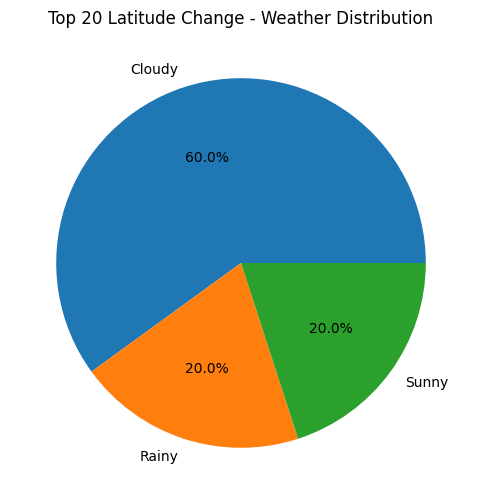

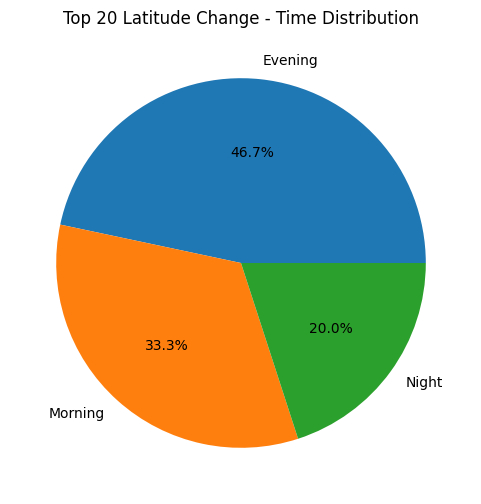

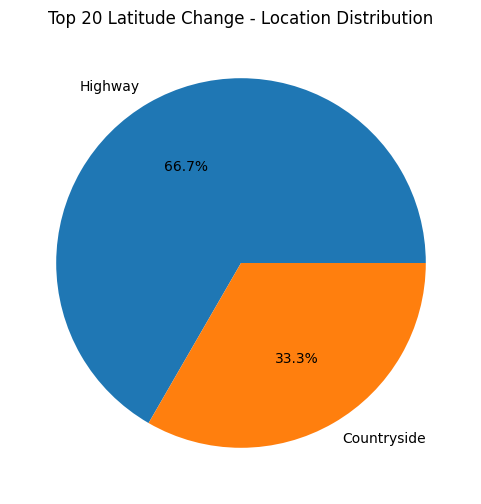

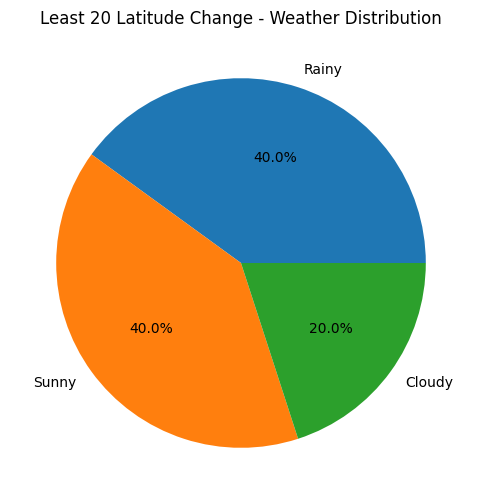

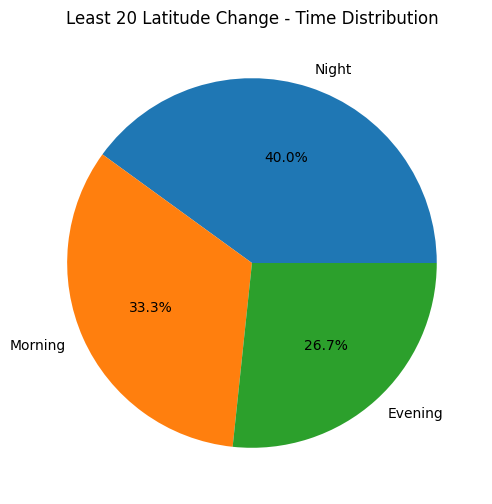

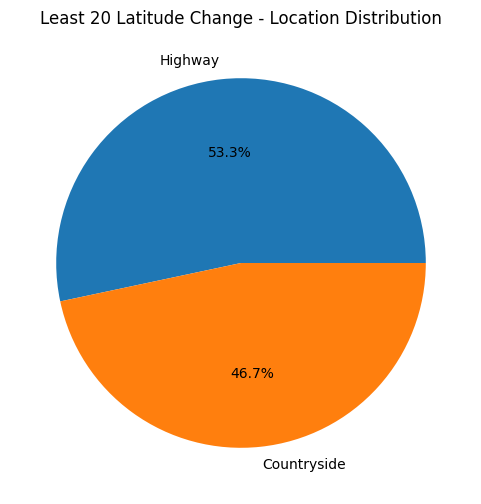

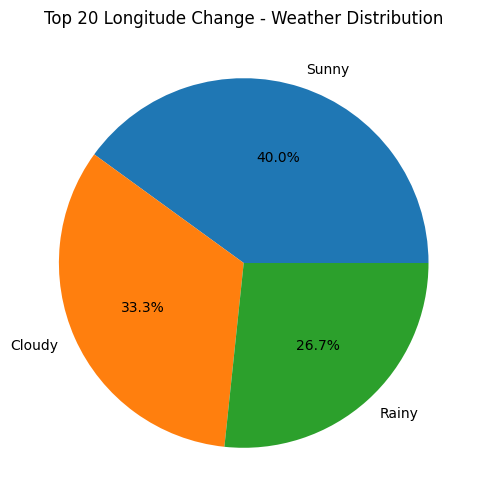

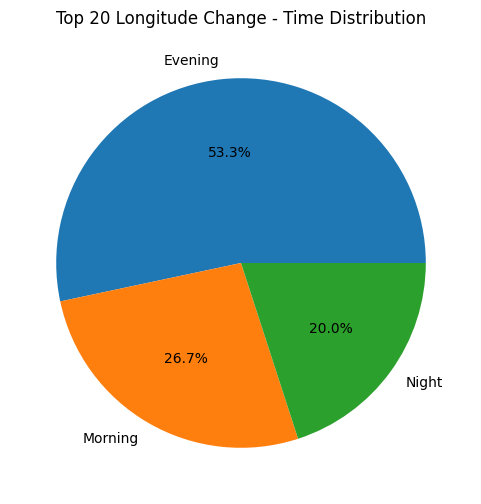

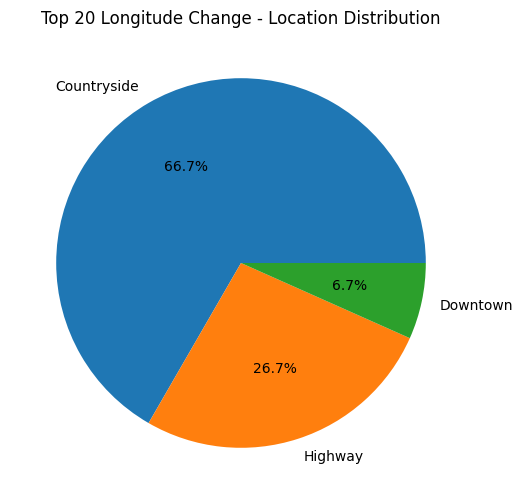

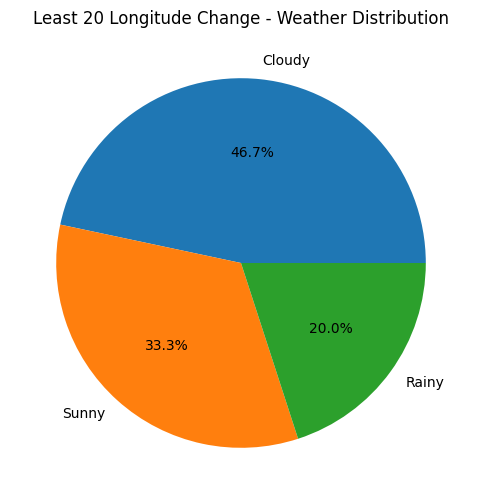

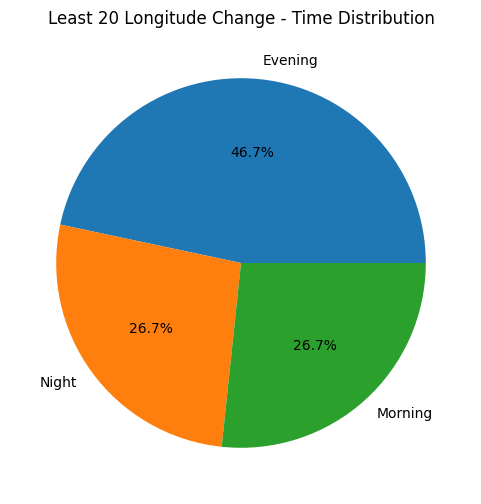

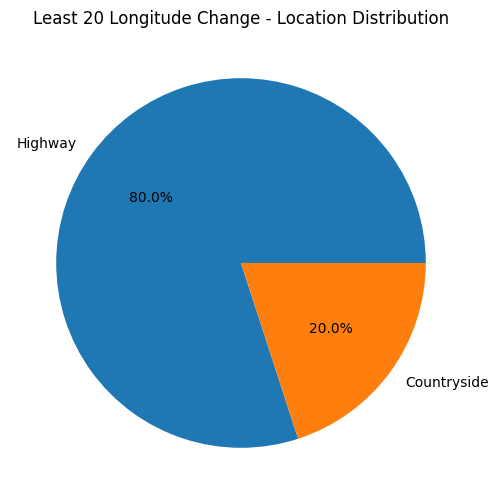

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
# Merge with design_data and analyze conditions
def merge_and_analyze(stats_series, design_data):
  stats_df = pd.DataFrame(stats_series).reset_index()
  merged_df = pd.merge(stats_df, design_data, on='file_number')
  return merged_df

# Latitude Change
top_20_lat_change_df = merge_and_analyze(top_20_lat_change, design_data)
least_20_lat_change_df = merge_and_analyze(least_20_lat_change, design_data)

# Longitude Change
top_20_lon_change_df = merge_and_analyze(top_20_lon_change, design_data)
least_20_lon_change_df = merge_and_analyze(least_20_lon_change, design_data)

# Plotting
def plot_pie_charts(df, title_prefix):
  for column in ['weather', 'time', 'location']:
    plt.figure(figsize=(6, 6))
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'{title_prefix} {column.capitalize()} Distribution')
    plt.ylabel('')
    plt.show()

# Plot for Latitude Change
plot_pie_charts(top_20_lat_change_df, 'Top 20 Latitude Change -')
plot_pie_charts(least_20_lat_change_df, 'Least 20 Latitude Change -')

# Plot for Longitude Change
plot_pie_charts(top_20_lon_change_df, 'Top 20 Longitude Change -')
plot_pie_charts(least_20_lon_change_df, 'Least 20 Longitude Change -')


In [ ]:
def analyze_group(df):
    result = df.groupby(df['event_type'].ne(df['event_type'].shift()).cumsum())['event_type'].value_counts()
    return result


In [ ]:

def analyze_speed_changes(df):
  result = df.groupby('file_number')['speed'].apply(lambda x: (x.diff() != 0).sum())
  return result


In [ ]:
grouped_results = data.groupby('file_number').apply(analyze_speed_changes)
